In [12]:
import pandas as pd
import numpy as np
import seaborn as sp
import scipy.stats as stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
rb_scaler = RobustScaler()
sd_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [4]:
df = pd.read_csv("wine_test.csv")
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [31]:
df['alcohol'].fillna(df['alcohol'].median(), inplace=True)
df['nonflavanoid_phenols'].fillna(df['nonflavanoid_phenols'].mean(), inplace=True)

In [32]:
df_n= df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class']]

In [39]:
df_n

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [48]:
df_n.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df_n.drop('class',axis=1), 
                                                    df_n['class'], test_size=0.3, random_state=111)

In [52]:
x_train_sd = sd_scaler.fit_transform(x_train)
x_test_sd = sd_scaler.fit_transform(x_test)

In [57]:
knn = KNeighborsClassifier()
knn.fit(x_train_sd, y_train)
pred = knn.predict(x_test_sd)

In [58]:
pred

array([1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1,
       1, 2, 1, 0, 1, 0, 1, 1, 1, 2], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9444444444444444

예측률 94%

# 하이퍼 파라미터
 - n_neighbors: knn에서 n의 개수(계산시 참고할 이웃의 수)
 - weights
 - metrics

In [61]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train_sd, y_train)
pred=knn.predict(x_test_sd)
accuracy_score(y_test,pred)

0.9444444444444444

In [62]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train_sd,y_train)
pred = knn.predict(x_test_sd)
accuracy_score(y_test,pred)

0.9444444444444444

In [64]:
knn = KNeighborsClassifier(n_neighbors=17) 
knn.fit(x_train_sd,y_train)
pred=knn.predict(x_test_sd)
accuracy_score(y_test,pred)

0.9629629629629629

In [65]:
knnt=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)  #반복
    knn.fit(x_train_sd,y_train)
    pred=knn.predict(x_test_sd)
    print(i,accuracy_score(y_test,pred))
    knnt.append(accuracy_score(y_test,pred))

1 0.9259259259259259
2 0.9259259259259259
3 0.9444444444444444
4 0.9444444444444444
5 0.9444444444444444
6 0.9259259259259259
7 0.9444444444444444
8 0.9444444444444444
9 0.9629629629629629
10 0.9629629629629629
11 0.9629629629629629
12 0.9629629629629629
13 0.9629629629629629
14 0.9629629629629629
15 0.9629629629629629
16 0.9629629629629629
17 0.9629629629629629
18 0.9629629629629629
19 0.9629629629629629
20 0.9629629629629629
21 0.9629629629629629
22 0.9629629629629629
23 0.9629629629629629
24 0.9444444444444444
25 0.9629629629629629
26 0.9444444444444444
27 0.9629629629629629
28 0.9259259259259259
29 0.9444444444444444


<Axes: >

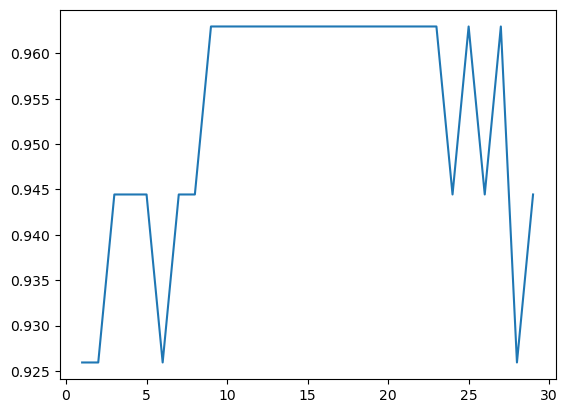

In [68]:
import seaborn as sns

sns.lineplot(x=range(1,30), y = knnt)